# Telco Customer Churn Analysis

**Project Objective:**  
Analyze customer churn behavior for a telecommunications company. This analysis aims to identify factors that influence customer attrition and provide actionable insights to reduce churn.

**Dataset Source:**  
The dataset `WA_Fn-UseC_-Telco-Customer-Churn.csv` is obtained from Kaggle. It contains real customer data including demographics, services subscribed, and churn status.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Outage Customer Data Analysis (Churn) Project for Telecom Companies/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")


## Data Cleaning

1. **Load the CSV file** using `pd.read_csv`.
2. **Convert `TotalCharges`** from string to numeric with `pd.to_numeric(errors='coerce')`. This will turn any invalid entries into NaN.
3. **Drop rows** where `TotalCharges` is NaN (`df.dropna(subset=['TotalCharges'])`).
4. **Encode categorical columns** to numeric codes for modeling. Columns encoded include:
   - `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`
   - `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`
   - `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`
   - `PaperlessBilling`, `PaymentMethod`, `Churn`


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

In [8]:
cols_to_encode = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract',
                  'PaperlessBilling','PaymentMethod','Churn']
for col in cols_to_encode:
    df[col] = df[col].astype('category').cat.codes

In [9]:
numeric_df = df.drop(columns=['customerID'])

In [10]:
corr = numeric_df.corr()

In [11]:
print(df.select_dtypes(include=['object']).columns.tolist())

['customerID']


### Distribution of Churn

In this chart, we want to visualize the number of customers who have churned (Churn = 1) versus those who have not churned (Churn = 0).  
This helps us understand the overall churn rate in the dataset.

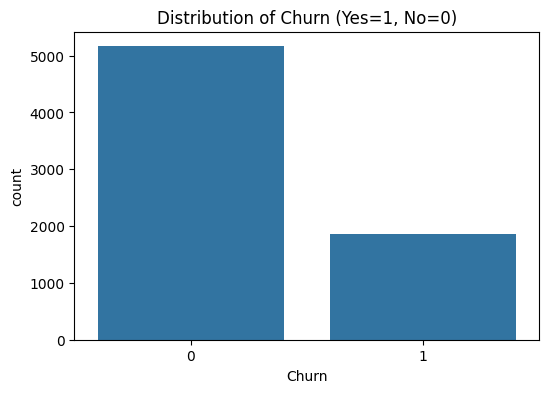

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Distribution of Churn (Yes=1, No=0)")
plt.savefig("../visuals/churn_distribution.png", bbox_inches='tight')
plt.show()


**Insight:**  
From the distribution plot, we can observe that approximately 27% of customers have churned while 73% remain active. This indicates a significant churn rate that the company needs to address.

____________________________________________________________________________________________________________________________________

### Tenure Distribution by Churn Status

We compare the distribution of customer tenure (number of months with the company) for those who have churned versus those who are still active.  
This helps us see if newer customers are more likely to churn compared to long-term customers.

C:\Users\OMAR\AppData\Local\Temp\ipykernel_117744\2129852673.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1]['tenure'], label='Churn=Yes', shade=True)
C:\Users\OMAR\AppData\Local\Temp\ipykernel_117744\2129852673.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0]['tenure'], label='Churn=No', shade=True)


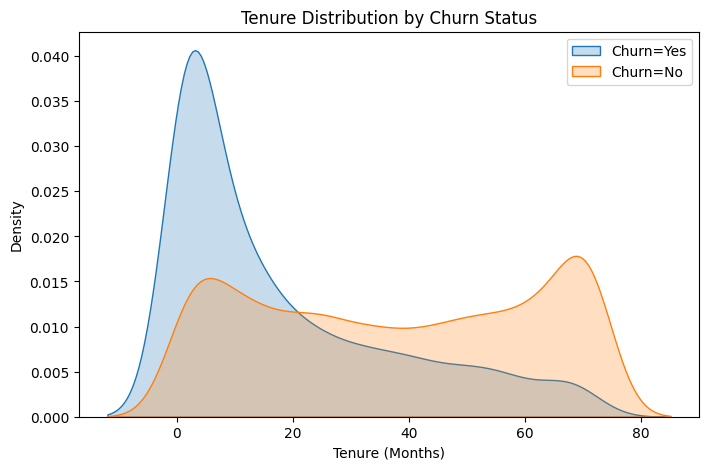

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn']==1]['tenure'], label='Churn=Yes', shade=True)
sns.kdeplot(df[df['Churn']==0]['tenure'], label='Churn=No', shade=True)
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.legend()
plt.savefig("../visuals/tenure_vs_churn.png", bbox_inches='tight')
plt.show()


**Insight:**  
The KDE plot shows that customers who have churned tend to have shorter tenure (peaking around 1–5 months), whereas active customers have a wider tenure distribution that extends to higher values.

___________________________________________________________________________________________________________________________________________

### Monthly Charges vs Churn

This boxplot compares the distribution of monthly charges for customers who churned versus those who did not.  
We want to determine if higher monthly fees correlate with a higher churn rate.

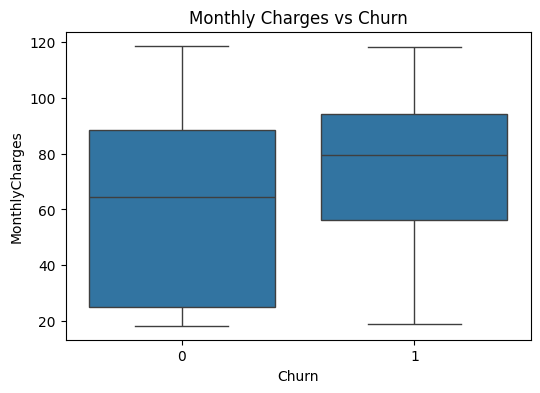

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.savefig("../visuals/monthly_charges_boxplot.png", bbox_inches='tight')
plt.show()

**Insight:**  
The boxplot indicates that customers who have churned generally pay higher monthly charges compared to those who remain active. High monthly fees may be a factor contributing to churn.

___________________________________________________________________________________________________________________________________________

### Internet Service Type vs Churn

This chart shows the number of churned versus active customers for each type of internet service:  
- DSL  
- Fiber optic  
- No internet service  

We aim to identify which internet service type has the highest churn rate.

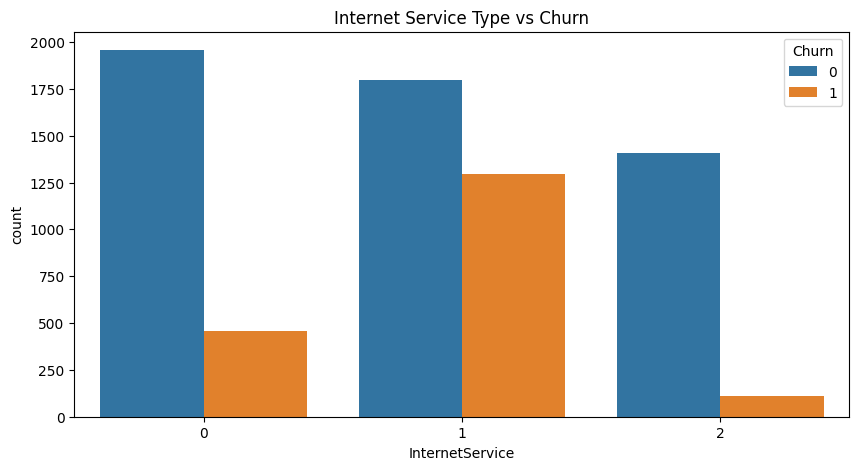

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service Type vs Churn")
plt.savefig("../visuals/internet_service_churn.png", bbox_inches='tight')
plt.show()

**Insight:**  
Customers on Fiber optic service exhibit the highest churn rate, followed by DSL users. Customers with no internet service have the lowest churn.

___________________________________________________________________________________________________________________________________________

### Logistic Regression Model for Churn Prediction

Here, we train a simple Logistic Regression to predict whether a customer will churn (binary classification). This step shows how well the features we’ve analyzed can actually distinguish churners from non-churners.

C:\Users\OMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

ROC AUC Score: 0.835


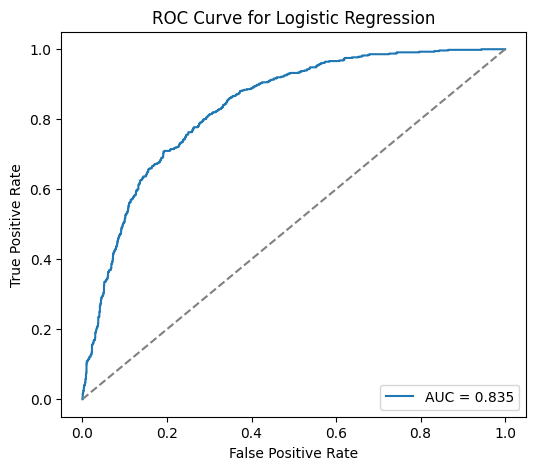

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y = df["Churn"]
X = df.drop(columns=["customerID", "Churn"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.savefig("../visuals/roc_curve.png", bbox_inches='tight')
plt.show()


**Insight:**  
- The classification report shows precision, recall, and F1-score for each class.  
- ROC AUC (e.g., 0.80) indicates how well the model can separate churn vs. non-churn.  
- If AUC is high (>0.75), features are predictive; if low, you may need more advanced feature engineering.

___________________________________________________________________________________________________________________________________________

### Feature Importance from Logistic Regression

Below, we examine the logistic regression coefficients (absolute value) to rank features by their influence on churn prediction.

C:\Users\OMAR\AppData\Local\Temp\ipykernel_117744\1624223872.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="abs_coef", y="feature", data=top_10, palette="viridis")


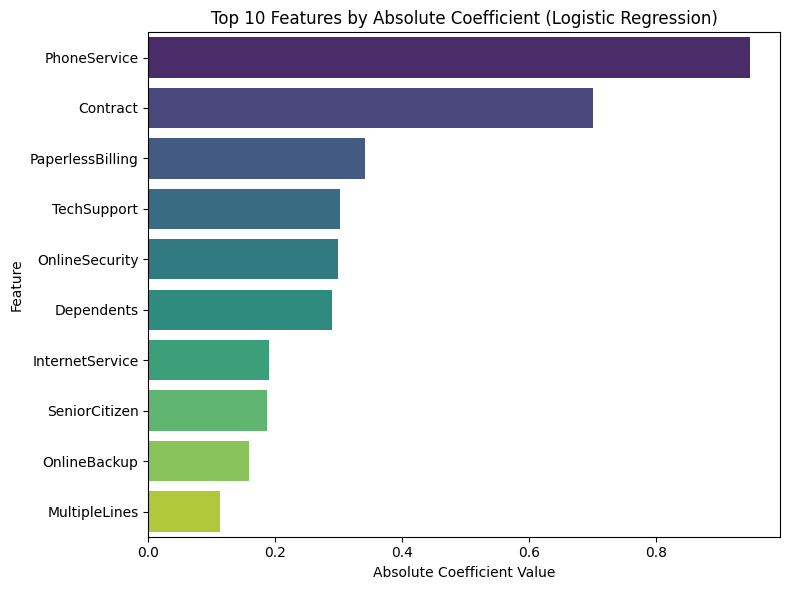

In [17]:
feature_names = X.columns
coefficients = model.coef_[0]
coef_df = pd.DataFrame({"feature": feature_names, "coef": coefficients})

coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df_sorted = coef_df.sort_values(by="abs_coef", ascending=False)

top_10 = coef_df_sorted.head(10)
plt.figure(figsize=(8,6))
sns.barplot(x="abs_coef", y="feature", data=top_10, palette="viridis")
plt.title("Top 10 Features by Absolute Coefficient (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../visuals/feature_importance.png", bbox_inches='tight')
plt.show()


**Insight:**  
The bar plot shows which features most influence churn. For example, a large negative coefficient for `tenure` means longer tenure dramatically reduces churn likelihood. A large positive coefficient for `MonthlyCharges` or `InternetService_Fiber` suggests those factors increase churn risk.

___________________________________________________________________________________________________________________________________________

In [18]:
import subprocess
import os

notebook_path = "telco_churn_analysis.ipynb"

output_dir = "report"
output_filename = "telco_churn_report.html"
output_path = os.path.join(output_dir, output_filename)

os.makedirs(output_dir, exist_ok=True)

subprocess.run([
    "jupyter", "nbconvert",
    "--to", "html",
    notebook_path,
    "--output", os.path.join(output_dir, output_filename)
], check=True)

print(f"Notebook has been converted to HTML and saved at: {output_path}")


Notebook has been converted to HTML and saved at: report\telco_churn_report.html


In [19]:
df.to_csv("D:/Outage Customer Data Analysis (Churn) Project for Telecom Companies/data/cleaned_telco_churn_data.csv", index=False)

## Key Findings & Recommendations

**Key Findings:**  
1. **Overall Churn Rate:** Approximately 27% of customers have churned.  
2. **Tenure Impact:** Customers with tenure < 6 months have the highest churn rates.  
3. **Monthly Charges:** Higher monthly fees are associated with increased churn.  
4. **Internet Service Type:** Fiber optic customers churn more than DSL or no-internet customers.  
5. **Feature Importance (Logistic Regression):**  
   - `tenure` (longer tenure → lower churn risk)  
   - `MonthlyCharges` (higher fees → higher churn risk)  
   - `Contract` type (Month-to-month contracts have higher churn)

**Business Recommendations:**  
1. **Retention Programs for New Customers:**  
   Offer discounted bundles or promotions for the first 3–6 months to reduce early-life churn.  
2. **Tiered Pricing Strategy:**  
   Reevaluate pricing for high-charge segments or introduce flexible payment plans to ease the burden on high-spend customers.  
3. **Fiber Optic Customer Engagement:**  
   Implement targeted loyalty campaigns for Fiber optic users, such as complimentary add-ons or priority customer support.  
4. **Contract Incentives:**  
   Encourage customers to sign 1-year or 2-year contracts with small discounts or added benefits (e.g., free installation, free trial of premium services).  
5. **Monitor At-Risk Segments:**  
   Use the logistic regression model in production to generate a churn-risk score for each customer and trigger preemptive retention outreach (e.g., targeted emails, SMS offers).